In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

import plotly.express as px
import geopandas as gpd
import plotly.graph_objects as go
from shapely.geometry import LineString
%matplotlib inline

In [2]:
df = pd.read_csv("../data/measurement_record_2009-2019/11-18_random_geoinfo.csv")
df.head(5)

,client_lat,client_lon,server_lat,server_lon
0,34.142,-81.205,33.6367,-84.4281
1,33.607,-88.317,33.6367,-84.4281
2,37.751,-97.822,32.8969,-97.0381
3,36.978,-93.233,41.9786,-87.9047
4,43.164,-70.675,45.4576,-73.7497


In [3]:
px.set_mapbox_access_token(open("../tools&keys/mapbox.txt").read())

In [4]:
fig = px.scatter_mapbox(df, 
                        lat='client_lat', 
                        lon='client_lon', 
                        zoom=3)
# fig.show(width=1000, height=800)
# fig.write_html('./graphs/client_loc_map.html')

In [5]:
fig = px.scatter_mapbox(df, 
                        lat='server_lat', 
                        lon='server_lon', 
                        zoom=3)
# fig.show(width=1000, height=800)
# fig.write_html('./graphs/server_loc_map.html')

We can see that the server and clients are not evenly distributed, so next we want to do get a random sample of this sample to further see what are the distance distribution.

In [6]:
sample_df = df.sample(n=200, random_state=1)

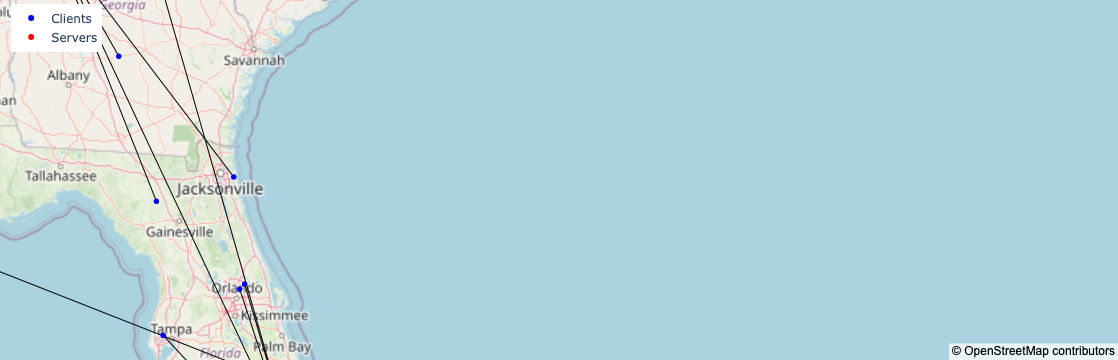

In [8]:
fig = go.Figure()

# Connect each client-server pair with black lines
for i in range(len(sample_df)):
    fig.add_trace(go.Scattermapbox(
        lat=[sample_df.iloc[i]['client_lat'], sample_df.iloc[i]['server_lat']],
        lon=[sample_df.iloc[i]['client_lon'], sample_df.iloc[i]['server_lon']],
        mode='lines',
        line=dict(width=1, color='black'),  # Set lines to black color
        showlegend=False  # Hide legend entry for lines
    ))

# Add client locations as blue dots
fig.add_trace(go.Scattermapbox(
    lat=sample_df['client_lat'],
    lon=sample_df['client_lon'],
    mode='markers',
    marker=dict(size=6, color='blue'),
    name='Clients'
))

# Add server locations as red dots
fig.add_trace(go.Scattermapbox(
    lat=sample_df['server_lat'],
    lon=sample_df['server_lon'],
    mode='markers',
    marker=dict(size=6, color='red'),
    name='Servers'
))

# Set the layout properties
fig.update_layout(
    margin={'l': 0, 't': 0, 'b': 0, 'r': 0},
    mapbox=dict(
        style="open-street-map",
        zoom=3,  # Zoom level might need to be adjusted for better view
        center=dict(lon=sample_df['client_lon'].mean(), lat=sample_df['client_lat'].mean())
    ),
    legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01)
)

# fig.show()
# fig.write_html('../graphs/requests_distance_map.html')

We can also visualize the throughput.

In [9]:
df = pd.read_csv("../data/measurement_record_2009-2019/15-18_network_us.csv")
df.head(5)

,client_lat,client_lon,server_lat,server_lon,rtt,throughput
0,48.1990,-114.3860,51.1315,-114.01060,58.0,12.303676
1,42.1616,-84.0238,58.8767,5.63780,131.0,61.460690
2,42.1616,-84.0238,48.8584,2.34900,101.0,67.424352
3,44.6444,-68.7402,46.1073,-64.67380,46.0,22.199707
4,26.1550,-98.2040,48.8584,2.34901,123.0,11.579812


In [10]:
df['distance'] = np.sqrt((df['client_lat'] - df['server_lat'])**2 + (df['client_lon'] - df['server_lon'])**2)

In [11]:
df['penalized_rtt'] = df['rtt'] / df['distance']
df['penalized_throughput'] = np.sqrt(df['throughput'])

In [12]:
df.head(10)

,client_lat,client_lon,server_lat,server_lon,rtt,throughput,distance,penalized_rtt,penalized_throughput
0,48.1990,-114.3860,51.1315,-114.01060,58.0,12.303676,2.956431,19.618252,3.507660
1,42.1616,-84.0238,58.8767,5.63780,131.0,61.460690,91.206343,1.436304,7.839687
2,42.1616,-84.0238,48.8584,2.34900,101.0,67.424352,86.632025,1.165851,8.211233
3,44.6444,-68.7402,46.1073,-64.67380,46.0,22.199707,4.321537,10.644360,4.711657
4,26.1550,-98.2040,48.8584,2.34901,123.0,11.579812,103.084200,1.193199,3.402912
5,40.6450,-73.9450,48.8584,2.34901,143.0,1.007712,76.734842,1.863560,1.003849
6,46.5370,-111.7700,51.1315,-114.01060,80.0,4.851995,5.111724,15.650298,2.202725
7,47.9676,-116.6809,51.1315,-114.01060,14.0,24.156381,4.140141,3.381528,4.914914
8,39.9460,-74.5560,48.8584,2.34901,99.0,22.224838,77.419710,1.278744,4.714323
9,25.7741,-80.1817,52.3086,4.76390,175.0,7.524361,88.993453,1.966437,2.743057


In [ ]:
fig = px.density_mapbox(df, lat='client_lat', lon='client_lon', z='rtt', radius=10,
                        center=dict(lat=0, lon=180), zoom=0,
                        mapbox_style="open-street-map")
fig.show()
# fig.write_html('../graphs/15-19rtt.html')

In [ ]:
fig = px.density_mapbox(df, lat='client_lat', lon='client_lon', z='penalized_rtt', radius=10,
                        center=dict(lat=0, lon=180), zoom=0,
                        mapbox_style="open-street-map")
fig.show()
# fig.write_html('../graphs/15-19penalized_rtt.html')

In [ ]:
fig = px.density_mapbox(df, lat='client_lat', lon='client_lon', z='penalized_throughput', radius=10,
                        center=dict(lat=0, lon=180), zoom=0,
                        mapbox_style="open-street-map")
fig.show()

now we wang to filter out the rows where penalized_rtt > 50

In [23]:
df = df[df['penalized_rtt'] < 50]

In [24]:
df

,client_lat,client_lon,server_lat,server_lon,rtt,throughput,distance,penalized_rtt,penalized_throughput
0,48.1990,-114.3860,51.1315,-114.01060,58.0,12.303676,2.956431,19.618252,3.507660
1,42.1616,-84.0238,58.8767,5.63780,131.0,61.460690,91.206343,1.436304,7.839687
2,42.1616,-84.0238,48.8584,2.34900,101.0,67.424352,86.632025,1.165851,8.211233
3,44.6444,-68.7402,46.1073,-64.67380,46.0,22.199707,4.321537,10.644360,4.711657
4,26.1550,-98.2040,48.8584,2.34901,123.0,11.579812,103.084200,1.193199,3.402912
...,...,...,...,...,...,...,...,...,...
130721,33.7011,-117.7970,33.9425,-118.40720,10.0,14.161295,0.656215,15.238910,3.763150
130722,36.1440,-115.2790,33.9425,-118.40720,32.0,45.975638,3.825211,8.365552,6.780534
130723,32.2220,-110.9260,33.9425,-118.40720,15.0,82.877427,7.676488,1.954018,9.103704
130724,32.6360,-117.0530,33.9425,-118.40720,9.0,70.964445,1.881701,4.782906,8.424040


In [ ]:
fig = px.density_mapbox(df, lat='client_lat', lon='client_lon', z='penalized_rtt', radius=10,
                        center=dict(lat=0, lon=180), zoom=0,
                        mapbox_style="open-street-map")

fig.show()
# fig.write_html('../graphs/15-19penalized_rtt<50.html')